<a href="https://colab.research.google.com/github/ekacelnik/puc-dados-analytics/blob/main/MVP_Sprint_AnalisedeDados_ErikaKacelnik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Sprint: Análise de Dados e Boas Práticas

## Especialização em Ciência de Dados e Analytics - PUC-Rio

Erika Kacelnik

10 de dezembro de 2023

Professores: Tatiana Escovedo e Hugo Villamizar



# 1\. Introdução

Este trabalho pretende exercitar habilidades de análise exploratória e pré-processamento de dados aprendidas durante a sprint de "Análise de Dados e Boas Práticas". Para isso, trabalharemos os dados do dataset "Student Stress Factors: A Comprehensive Analysis", disponibilizado gratuitamente no Kaggle.

#  2\. Definição do Problema

Com o objetivo de instruir faculdades no auxílio à saúde mental dos alunos e no fornecimento de ajuda preventiva, queremos entender se é possível prever o nível de estresse dos estudantes a partir de um formulário simples.

Assim, usaremos os dados do dataset "Student Stress Factors: A Comprehensive Analysis" como uma pesquisa-teste, para entender se esses fatores conseguem alimentar um modelo que preveja o nível de estresse (stress_level).

Também buscaremos entender se é possível prever o nível de estresse com menos fatores. Assim, separaremos os atributos que mais impactam o nível de estresse em um novo dataset, para também aplicá-lo posteriormente em um modelo.

Dado que o atributo "stress_level" está disposto em "Low", "Medium" e "High", prepararemos nossos dados para um modelo de classificação, que constitui um tipo de aprendizado supervisionado.

De acordo com o autor do dataset, que realizou a pesquisa nele descrita, os dados foram coletados com alunos de escolas e faculades da cidade de Dharan, no Nepal. Suas idades variavam de 15 a 24 anos, e os dados foram coletados entre junho e outubro de 2022.


# 3\. Configurações iniciais

## 3\.1 Importação das bibliotecas

Primeiro vamos instalar as bibliotecas necessárias para as análises.

In [80]:
## Carregando as bibliotecas utilizadas

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## 3\.2 Carga do dataset

Agora vamos importar o dataset escolhido, **Student Stress Factors: A Comprehensive Analysis**, para ser trabalhado a partir de um link e armazenaremos os dados em um dataframe Pandas.

In [81]:
# Carregando dados brutos do dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/ekacelnik/puc-dados-analytics/main/StressLevelDataset.csv?token=GHSAT0AAAAAACK77DCAPVVYN23UVQHSOVPOZLIT36A",
                  engine="python")

# Exibindo o dataframe carregado
dataset

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


In [82]:
# Verificando se o conjunto é mesmo um dataframe Pandas
type(dataset)

pandas.core.frame.DataFrame

# 4\. Análise exploratória e visualizações

## 4\.1 Análise e descrição dos atributos

Vamos iniciar com alguns comandos da biblioteca Pandas para verificar as variáveis e descrevê-las.

In [83]:
# Listando os nomes das colunas
dataset.columns

Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression',
       'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem',
       'noise_level', 'living_conditions', 'safety', 'basic_needs',
       'academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns', 'social_support', 'peer_pressure',
       'extracurricular_activities', 'bullying', 'stress_level'],
      dtype='object')

In [84]:
# Verificando os tipos de dados em cada coluna do conjunto
dataset.dtypes

anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_relationship    int64
future_career_concerns          int64
social_support                  int64
peer_pressure                   int64
extracurricular_activities      int64
bullying                        int64
stress_level                    int64
dtype: object

#### Descrição dos atributos

**Atributos que tratam de fatores psicológicos**

_anxiety_level_ - Qualitativa ordinal. Tem valores na escala entre 0 e 21, obtidos a partir do método GAD-7, um questionário autoadministrado para medir índices de Transtorno de Ansiedade Generalizada.

_self_esteem_ - Qualitativa ordinal. Tem valores na escala entre 0 e 30, obtidos a partir do método Rosenberg Self Esteem Scale, um instrumento autoadministrado para medir nível de autoestima.

*_mental_health_history_* - Qualitativa nominal. Variável booleana que mede se o respondente tem algum histórico de questão de saúde mental: 0 para "não tem histórico" e 1 para "tem histórico".

_depression_ - Qualitativa ordinal. Tem valores na escala entre 0 e 27, obtidos a partir do método Patient Health Questionnaire (PHQ-9), um instrumento autoadministrado para medir transtornos depressivos.

<br>

A respeito do restante dos atributos, não existe informação sobre como foi sua medição. A partir de comentários do autor do dataset, e para fins didáticos, assumiremos que foram feitas sem seguir à risca nenhum protocolo médico, apenas com base na interpretação do respondente sobre si mesmo em uma escala pré-determinada.

<br>

**Atributos que tratam de fatores fisiológicos**

_headache_ - Qualitativa ordinal. Medida de dor de cabeça recorrente do respondente. Escala de 0 a 5.

_blood_pressure_ - Qualitativa ordinal. Medida de pressão arterial recorrente do respondente. Escala de 1 a 3.

_sleep_quality_ - Qualitativa ordinal. Medida de qualidade do sono recorrente do respondente. Escala de 0 a 5.

_breathing_problem_ - Qualitativa ordinal. Medida de dificuldade respiratória (não-especificada) recorrente do respondente. Escala de 0 a 5.

<br>

**Atributos que tratam de fatores ambientais**

_noise_level_ - Qualitativa ordinal. Nível típico de barulho no ambiente do respondente. Escala de 0 a 5.

_living_conditions_ - Qualitativa ordinal. Qualidade das condições de vida do respondente. Escala de 0 a 5.

_safety_ - Qualitativa ordinal. Nivel de segurança do ambiente do respondente. Escala de 0 a 5.

_basic_needs_ - Qualitativa ordinal. Nível de atendimento das necessidades básicas do respondente. Escala de 0 a 5.

<br>

**Atributos que tratam de fatores acadêmicos**

_academic_performance_ - Qualitativa ordinal. Rndimento acadêmico do respondente. Escala de 0 a 5.

_study_load_ - Qualitativa ordinal. Carga de estudos do respondente. Escala de 0 a 5.

_teacher_student_relationship_ - Qualitativa ordinal. Nível de proximidade do respondente com professor/professores. Escala de 0 a 5.

_future_career_concerns_ - Qualitativa ordinal. Nível de preocupação do respondente com sua carreira no futuro. Escala de 0 a 5.

<br>

**Atributos que tratam de fatores sociais**

_social_support_ - Qualitativa ordinal. Nível de apoio que o respondente tem de seu círculo social. Escala de 0 a 3.

_peer_pressure_ - Qualitativa ordinal. Nível de pressão social que o respondente sente de seu grupo. Não foi especificado que tipo de pressão foi medida. Escala de 0 a 5.

_extracurricular_activities_ - Qualitativa ordinal. Quantidade de atividades extracurriculares ao qual o respondente participa. Escala de 0 a 5.

_bullying_ - Qualitativa ordinal. Nível de bullying sofrido pelo respondente. Escala de 0 a 5.

<br>

**Target variable do estudo**

_stress_level_ - Qualitativa ordinal. Nível de estresse sentido pelo respondente. Escala de 0 a 2.

<br>
<br>

À exceção de "mental_health_history" que é binária, todas as variáveis, apesar de serem numéricas, são qualitativas ordinais, pois representam um ranking criado, em vez de uma quantidade mensurável com intervalos possivelmente infinitos. Elas representam o valor de um atributo dentro de uma escala fabricada.

## 4\.2 Estatísticas e análises iniciais

Seguiremos com alguns comandos da biblioteca Pandas para verificar estatísticas descritivas e fazer uma análise exploratória inicial do conjunto de dados em questão.

In [85]:
# Verificando as primeiras 5 linhas do dataset
dataset.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [86]:
# Verificando as últimas 5 linhas do dataset
dataset.tail()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2
1099,18,6,1,15,3,3,0,3,3,0,...,3,3,4,3,3,1,5,1,4,2



Inicialmente, pela verificação das primeiras e últimas linhas, o dataset parece bem bem balanceado, com valores bem distribuídos. Não existem nessas linhas valores nulos, e todos os valores zerados pertencem a atributos as quais 0 é um valor possível.

Cabe agora varrer o dataset inteiro e ver se existem valores nulos ou duplicados.

## 4\.3 Verificação de nulos e duplicados

In [87]:
# Verificando as dimensões do dataset
dataset.shape

(1100, 21)

In [88]:
# Verificando a quantidade de instâncias por variável e se existem nulos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [89]:
# Verificando nulos
dataset.isnull().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

In [90]:
# Verificando instâncias duplicadas
dataset.duplicated().sum()

0

O conjunto de dados portanto tem 21 variáveis e 1100 instâncias, sem valores nulos nem duplicados.

Isso significa que o dataset apresenta 21 atributos diferentes de 1100 alunos.

Vamos analisar um sumário estatístico dos dados para verificar médias, medianas, mínimos e máximos, desvio-padrão e moda.

## 4\.4 Estatísticas descritivas

In [91]:
# Exibindo um sumário estatístico
dataset.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [92]:
# Exibindo a moda de cada coluna
dataset.mode(axis=0, numeric_only=True).iloc[0]

anxiety_level                   13
self_esteem                     25
mental_health_history            0
depression                      10
headache                         1
blood_pressure                   3
sleep_quality                    1
breathing_problem                2
noise_level                      2
living_conditions                2
safety                           2
basic_needs                      2
academic_performance             2
study_load                       2
teacher_student_relationship     2
future_career_concerns           1
social_support                   3
peer_pressure                    2
extracurricular_activities       2
bullying                         1
stress_level                     0
Name: 0, dtype: int64

A princípio, o sumário do dataset sugere um dataset balanceado, com quartis bem distribuídos e as médias, medianas e modas tendo valores muito próximos para todas as variáveis. Isso indica que não são muito influenciadas por outliers.

Avaliando os valores mínimos e máximos, confirmamos que de fato não existem outliers, dado que todos os valores correspondem ao valor mínimo e máximo da escala previamente definida de cada atributo.

Algumas variáveis, como "self_esteem", apresentam certo grau de assimetria, enquanto outras como "living_conditions" parecem seguir uma distribuição próxima da normal.

Vamos analisar mais à frente os histogramas dos atributos para observar isso mais de perto.

## 4\.5 Balanceamento da target variable

In [137]:
# Conferindo a distribuição de valores da target variable
dataset['stress_level'].value_counts()

0    373
2    369
1    358
Name: stress_level, dtype: int64

Como o objetivo é preparar os dados para um modelo de classificação, é preciso conferir o balanceamento da variável-alvo.

Aqui vemos que ela está balanceada, com cada um dos 3 valores possíveis representando praticamente um terço do dataset.

- 0/Low: 34%
- 1/Medium: 32,5%
- 2/High: 33,5%

## 4\.6 Analisando as distribuições

In [94]:
# Ordenando o dataset por valor decrescente de nível de estresse
dataset.sort_values(by='stress_level', ascending=False)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
1099,18,6,1,15,3,3,0,3,3,0,...,3,3,4,3,3,1,5,1,4,2
344,21,15,1,19,5,3,1,3,5,1,...,2,1,3,2,4,1,5,5,4,2
342,18,2,1,15,4,3,1,3,3,1,...,2,2,4,2,5,1,4,4,4,2
340,21,3,1,18,4,3,1,4,4,2,...,1,2,5,1,4,1,5,4,5,2
747,21,12,1,25,3,3,1,3,5,1,...,2,2,4,2,4,1,5,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,2,25,0,3,1,2,5,2,1,4,...,4,4,2,5,1,3,2,2,1,0
333,2,28,0,7,1,2,5,2,2,4,...,4,5,2,4,1,3,2,2,1,0
335,2,26,0,4,1,2,4,1,1,3,...,4,4,2,4,1,3,2,1,1,0
753,2,27,0,2,1,2,5,2,2,4,...,4,5,2,4,1,3,2,2,1,0


Observando rapidamente os primeiros 5 resultados com valor máximo para nível de estresse, identificamos valores bem altos de recorrência de questões de saúde mental, níveis de ansiedade, pressão dos pares, bullying, pressão arterial, entre outros.

Também, níveis baixos de autoestima, qualidade de sono, condições de vida e apoio social.

Outras variáveis, como relação entre professor e aluno e performance acadêmica, tem resultados menos claros.

Cabe investigar melhor em gráficos de correlação, mas uma história começa a se desenhar.

### 4\.6\.1 Histogramas

Vamos começar com um overview de histogramas, onde podemos visualizar a distribuição das variáveis quantitativas, entendendo se a distribuição é normal, assimétrica à esquerda ou à direita, unimodal, bimodal ou multimodal.



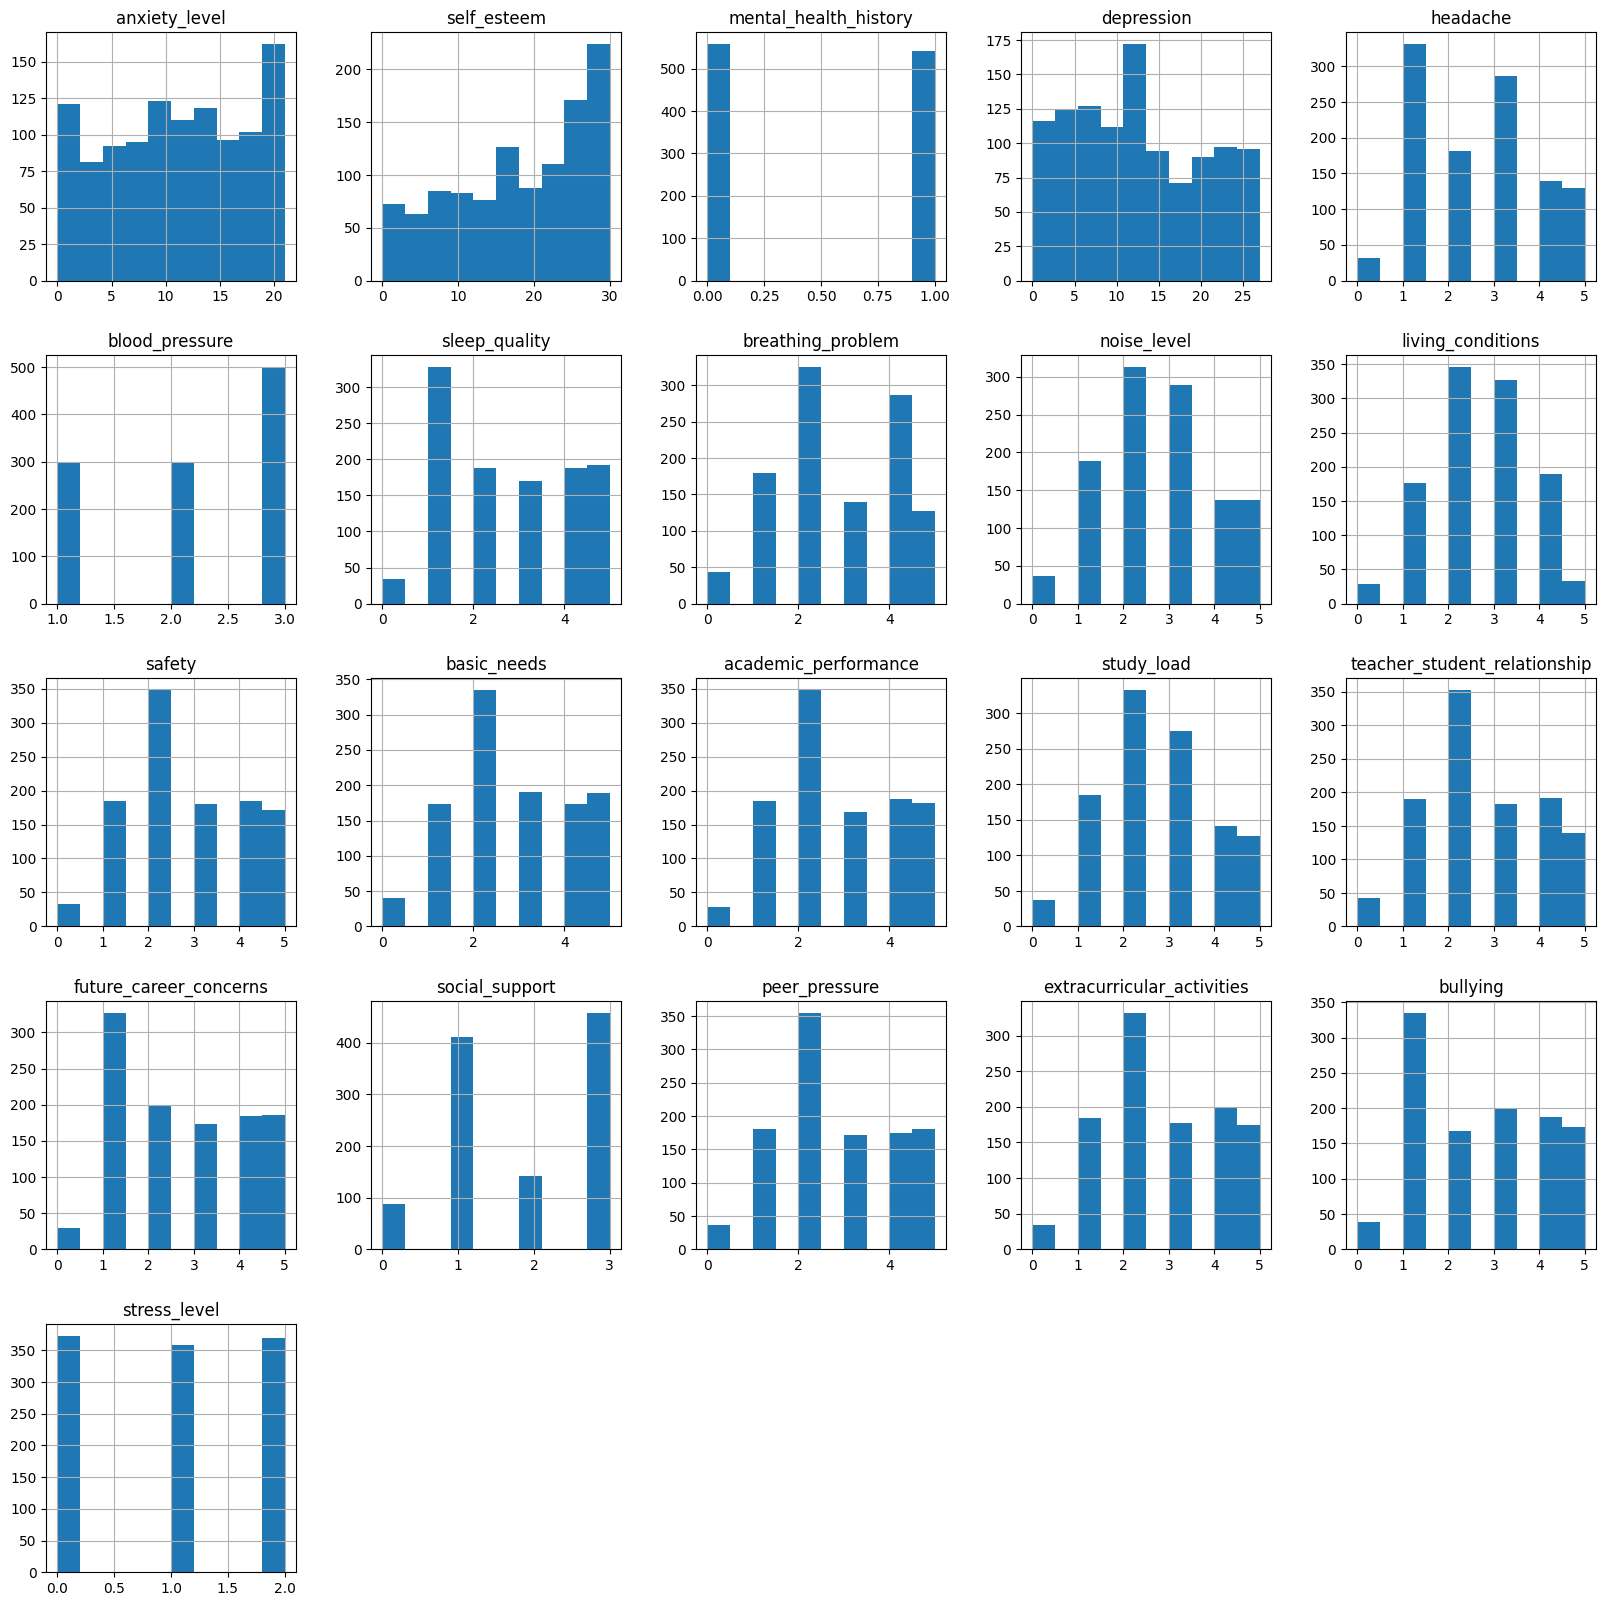

In [95]:
# Plotando histogramas
dataset.hist(figsize = (20,20))
plt.show()

A primeira percepção ao observar os histogramas é o fato dos fatores psicológicos estarem em escalas diferentes entre si e entre os demais atributos, que estão em sua maioria na escala 0-5. Cabe, a fim de tornar a análise mais intuitiva, adaptarmos as variáveis "anxiety_level", "self_esteem" e "depression" para essa escala.

Para isso, existem algumas opções de tratamento. Podemos normalizar os dados para essa escala, mantendo a distribuição, o que incluiria valores com decimais, ou discretizá-los para esse novo intervalo, efetivamente agrupando valores próximos em categorias de 0 a 5. Vamos testar ambas as abordagens mais a frente, na seção 5.

Existem algumas outras variáveis que não seguem a escala 0-5.

A "mental_health_history" é uma variável binária, indicando se o respondente tem ou não histórico de questões com saúde mental, portanto, deixaremos ela assim.

A "stress_level" é a a target variable, discretizada. Também a manteremos, interpretando os resultados como "Low", "Medium" e "High".

A "social_support" está em uma escala 0-3 e será mantida dessa forma.

A última é "blood_pressure", que também se apresenta de 0-3. O autor do dataset não passou informações coerentes sobre o que os valores dessa escala representam. Foram medidos ou são uma percepção do aluno? Pressão arterial precisa ser medida clinicamente, e existem valores de medição próprios e adequados. Dada a falta de clareza sobre essas informações e a baixa correlação (exibida em seguida) com variáveis que mais nos interessam, vamos remover essa variável do dataset no momento do pré-processamento.





### 4\.6\.2 Boxplots

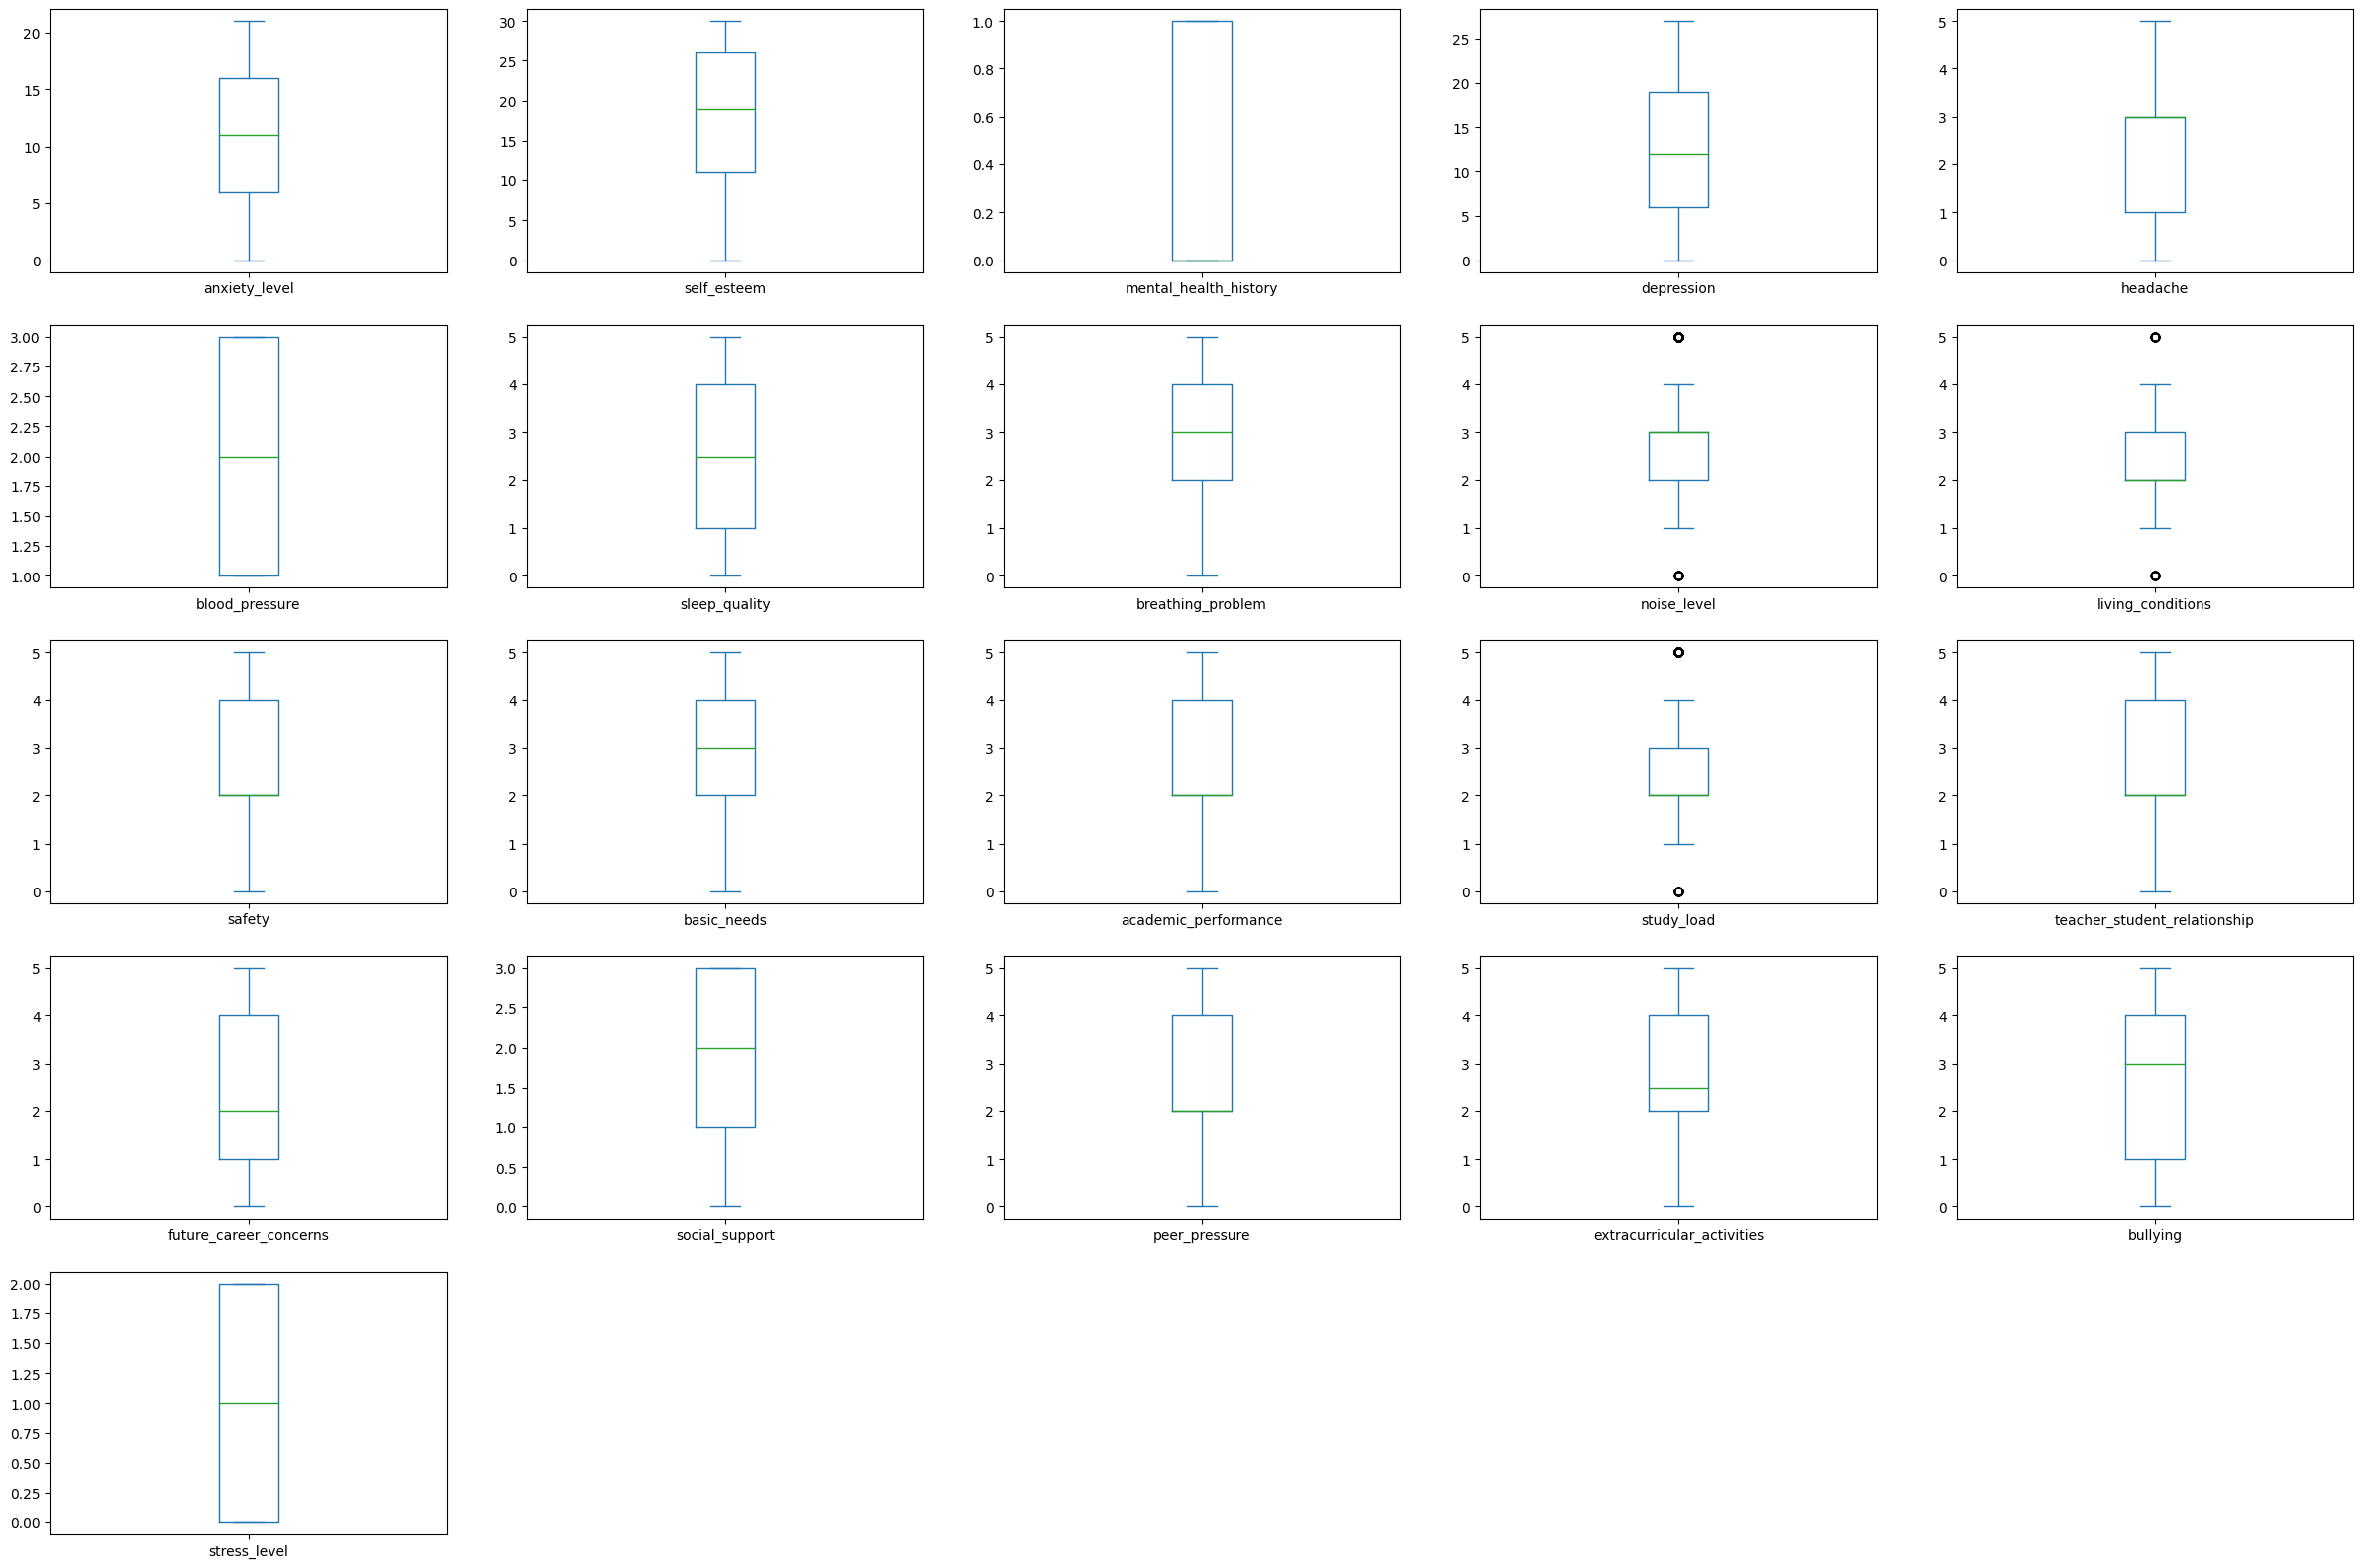

In [96]:
# Plotando boxplots
dataset.plot (kind = 'box', subplots = True, layout = (5,5), figsize = (30, 20))
plt.show ()

No boxplot, é possivel visualizar a concentração dos dados observando medianas, quartis e outliers.

Essa visualização não revela nada de muito novo em comparação com o histograma. Também torna intuitiva a visualização das distribuições, sendo fácil entender assimetrias.

É revelado que os atributos *noise_level*, *living_conditions* e *study_load* têm valores outliers. No entanto, esses são válidos e relevantes para a análise, portanto vamos mantê-los.

## 4\.7 Analisando relações entre atributos

### 4\.7\.1 Gráfico de correlação

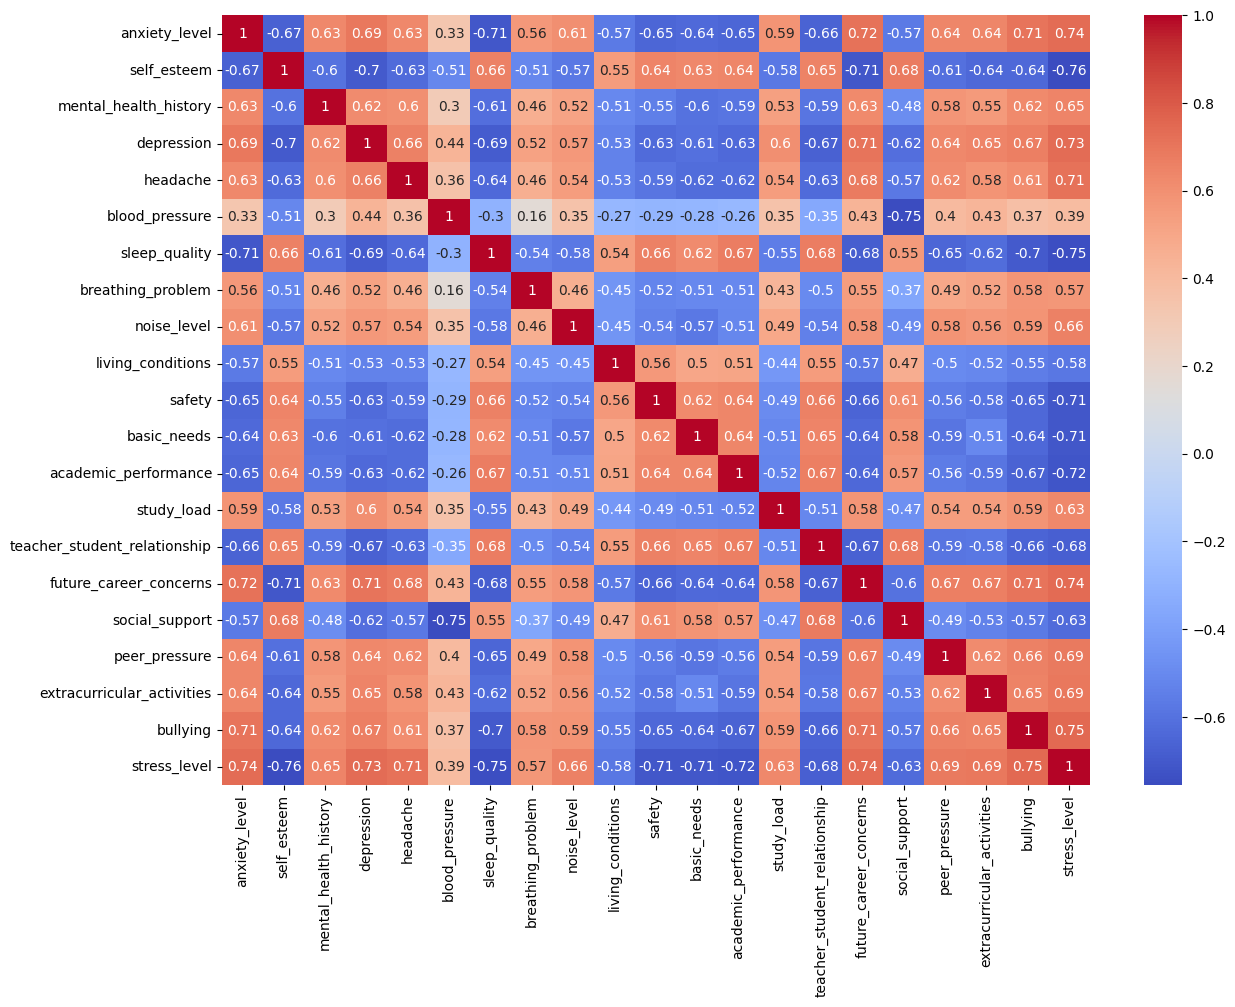

In [97]:
# Plotando o gráfico de correlação de todas as variáveis
corr_matrix = dataset.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

Essa dimensão de matriz é rica por comparar todos os dados do conjunto, mas vamos transformá-la em gráficos mais enxutos por fator para observar de froma mais direta as correlações com nível de estresse.

### 4\.7\.2 Gráfico de correlação por fator



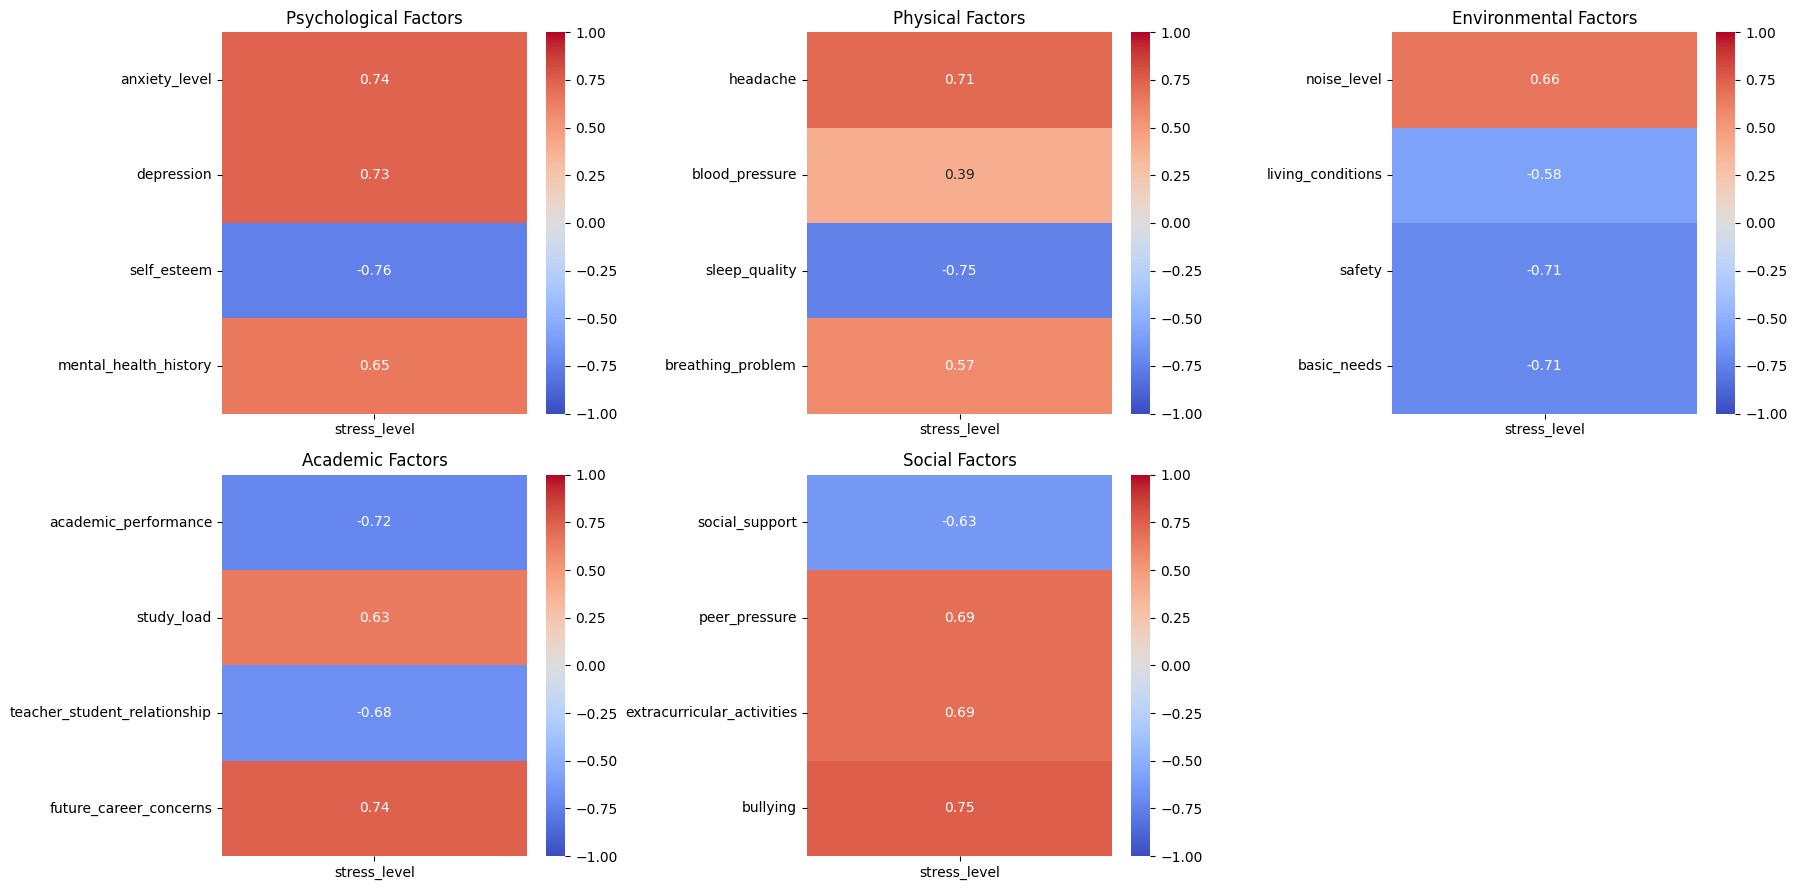

In [98]:
# Separando o dataframe em dataframes por fator a ser analisado
psychological_factors = dataset[["anxiety_level", "depression", "self_esteem", "mental_health_history", "stress_level"]]
physical_factors = dataset[["headache", "blood_pressure", "sleep_quality", "breathing_problem", "stress_level"]]
environmental_factors = dataset[["noise_level", "living_conditions", "safety", "basic_needs", "stress_level"]]
academic_factors = dataset[["academic_performance", "study_load", "teacher_student_relationship", "future_career_concerns", "stress_level"]]
social_factors = dataset[["social_support", "peer_pressure", "extracurricular_activities", "bullying", "stress_level"]]

# Organizando-os em um dicionário
factors = {
    'Psychological Factors': psychological_factors,
    'Physical Factors': physical_factors,
    'Environmental Factors': environmental_factors,
    'Academic Factors': academic_factors,
    'Social Factors': social_factors
}

# Plotando gráficos de correlação por fator
fig, axs = plt.subplots(2, 3, figsize=(18, 9))

for i, (name, factor) in enumerate(factors.items()):
    row = i // 3
    col = i % 3
    corr_matrix = factor.corr()
    sns.heatmap(corr_matrix.iloc[:-1,-1:], annot = True, cmap = 'coolwarm', vmax=1, vmin=-1, ax=axs[row][col]) # Garantir mesma escala de -1 a 1 em todos
    axs[row][col].set_title(name)

fig.delaxes(axs[1][2])

plt.tight_layout()
plt.show()


Observando os gráficos, torna-se mais fácil distinguir qual atributo de cada fator tem impacto mais significativo para o nível de estresse do aluno:

- Fator psicológico: self_esteem
- Fator físico: sleep_quality
- Fator ambiental: safety e basic_needs (mesmo grau de correlação)
- Fator acadêmico: future_career_concerns
- Fator social: bullying

Também conseguimos selecionar os 10 atributos com correlação mais forte para explorar com análises adicionais e usar no dataset mais enxuto, a fim de entender se eles nos fornecem informação necessária para inferir o nível de estresse de um aluno.

São eles:
- self_esteem (-0.76)
- bullying (0.75)
- sleep_quality (-0.75)
- future_career_concerns (0.74)
- anxiety_level (0.74)
- depression (0.73)
- academic_performance (0.72)
- headache (0.71)
- safety (-0.71)
- basic_needs (-0.71)


Vamos plotar mais algumas visualizações desses atributos para observar suas correlações. Começando por gráficos de dispersão.

### 4\.7\.3 Gráficos de dispersão

Gráficos de fatores psicológicos

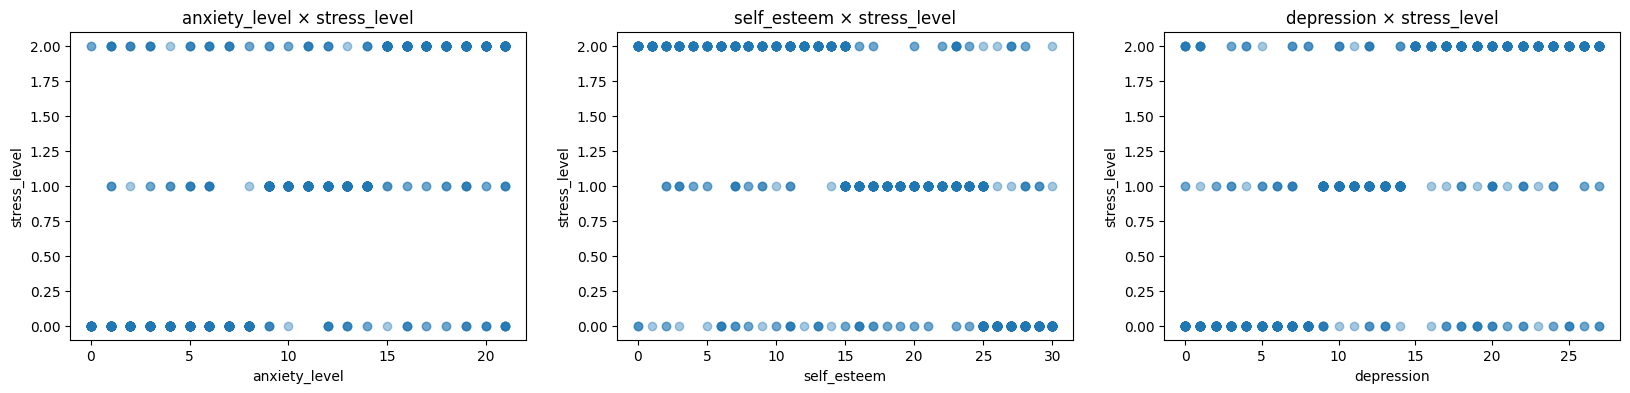

In [99]:
fig, axs = plt.subplots(1, 3, figsize=(20, 4))

# plotando o gráfico de 'anxiety_level' × 'stress_level'
axs[0].scatter(dataset['anxiety_level'], dataset['stress_level'], alpha=0.4)
axs[0].set_title("anxiety_level × stress_level")
axs[0].set_xlabel('anxiety_level')
axs[0].set_ylabel('stress_level')

# plotando o gráfico de 'self_esteem' × 'stress_level'
axs[1].scatter(dataset['self_esteem'], dataset['stress_level'], alpha=0.4)
axs[1].set_title("self_esteem × stress_level")
axs[1].set_xlabel('self_esteem')
axs[1].set_ylabel('stress_level')

# plotando o gráfico de 'depression' × 'stress_level'
axs[2].scatter(dataset['depression'], dataset['stress_level'], alpha=0.4)
axs[2].set_title("depression × stress_level")
axs[2].set_xlabel('depression')
axs[2].set_ylabel('stress_level');

Gráficos de fatores físicos

Text(0, 0.5, 'stress_level')

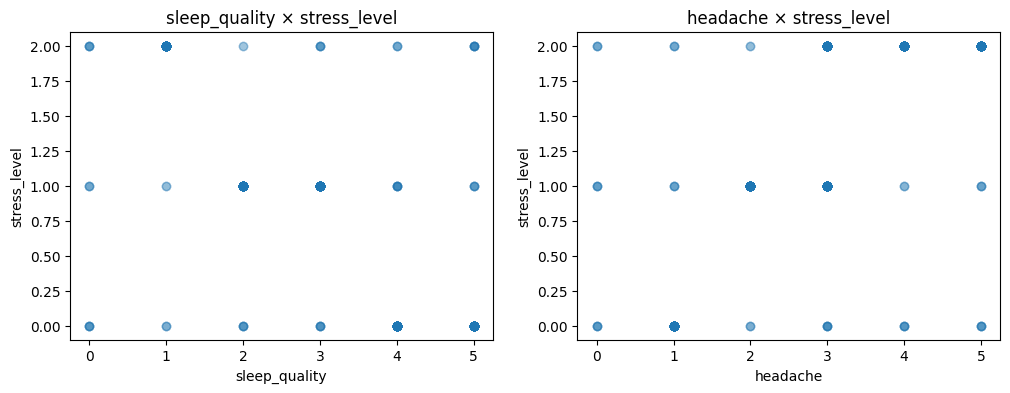

In [113]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# plotando o gráfico de 'sleep_quality' × 'stress_level'
axs[0].scatter(dataset['sleep_quality'], dataset['stress_level'], alpha=0.1)
axs[0].set_title("sleep_quality × stress_level")
axs[0].set_xlabel('sleep_quality')
axs[0].set_ylabel('stress_level')

# plotando o gráfico de 'headache' × 'stress_level'
axs[1].scatter(dataset['headache'], dataset['stress_level'], alpha=0.1)
axs[1].set_title("headache × stress_level")
axs[1].set_xlabel('headache')
axs[1].set_ylabel('stress_level')

Gráficos de fatores ambientais

Text(0, 0.5, 'stress_level')

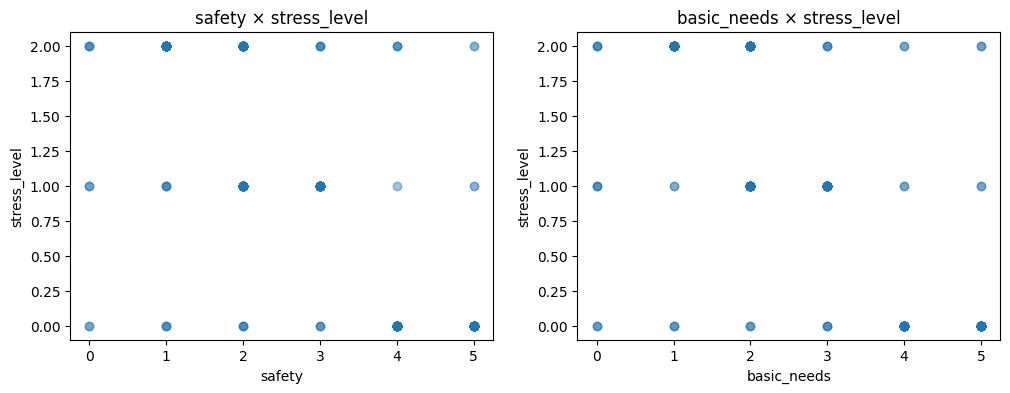

In [101]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# plotando o gráfico de 'safety' × 'stress_level'
axs[0].scatter(dataset['safety'], dataset['stress_level'], alpha=0.1)
axs[0].set_title("safety × stress_level")
axs[0].set_xlabel('safety')
axs[0].set_ylabel('stress_level')

# plotando o gráfico de 'basic_needs' × 'stress_level'
axs[1].scatter(dataset['basic_needs'], dataset['stress_level'], alpha=0.1)
axs[1].set_title("basic_needs × stress_level")
axs[1].set_xlabel('basic_needs')
axs[1].set_ylabel('stress_level')

Gráficos de fatores acadêmicos

Text(0, 0.5, 'stress_level')

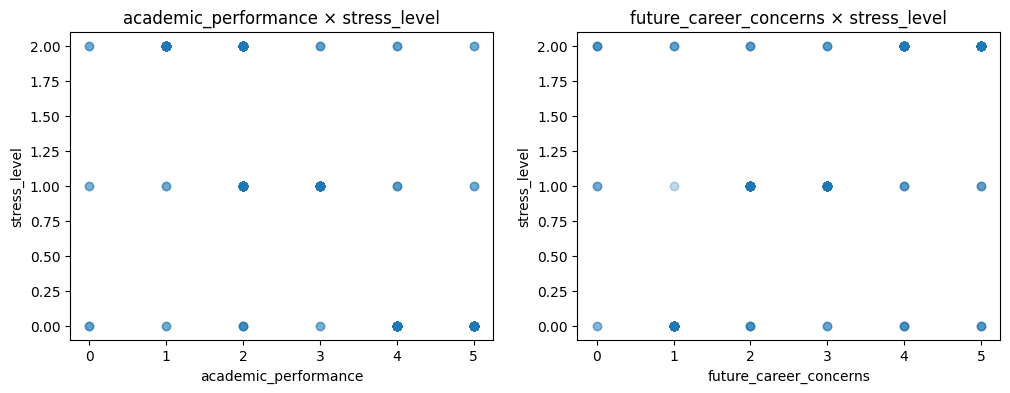

In [111]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# plotando o gráfico de 'academic_performance' × 'stress_level'
axs[0].scatter(dataset['academic_performance'], dataset['stress_level'], alpha=0.1)
axs[0].set_title("academic_performance × stress_level")
axs[0].set_xlabel('academic_performance')
axs[0].set_ylabel('stress_level')

# plotando o gráfico de 'future_career_concerns' × 'stress_level'
axs[1].scatter(dataset['future_career_concerns'], dataset['stress_level'], alpha=0.1)
axs[1].set_title("future_career_concerns × stress_level")
axs[1].set_xlabel('future_career_concerns')
axs[1].set_ylabel('stress_level')

Gráficos de fatores sociais

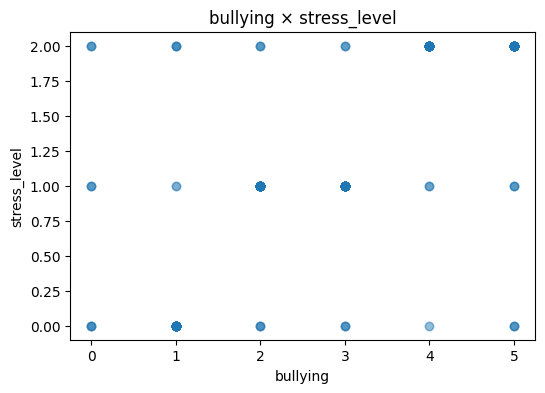

In [108]:
fig, ax = plt.subplots(figsize = (6, 4))

# plotando o gráfico de 'bullying' × 'stress_level'
plt.scatter(dataset['bullying'], dataset['stress_level'], alpha=0.1)

# incluindo título do gráfico e rótulos dos eixos
plt.title("bullying × stress_level")
plt.xlabel('bullying')
plt.ylabel('stress_level');

Os scatter plots não revelam nada de muito diferente dos gráficos de correlação. É possível enxergar as correlações por alto, mas, nos gráficos que plotam apenas variáveis de escala 0-5, os pontos não formam linhas tão claras.

Vamos plotar alguns gráficos com mais valores para observar a diferença.

Text(0, 0.5, 'depression')

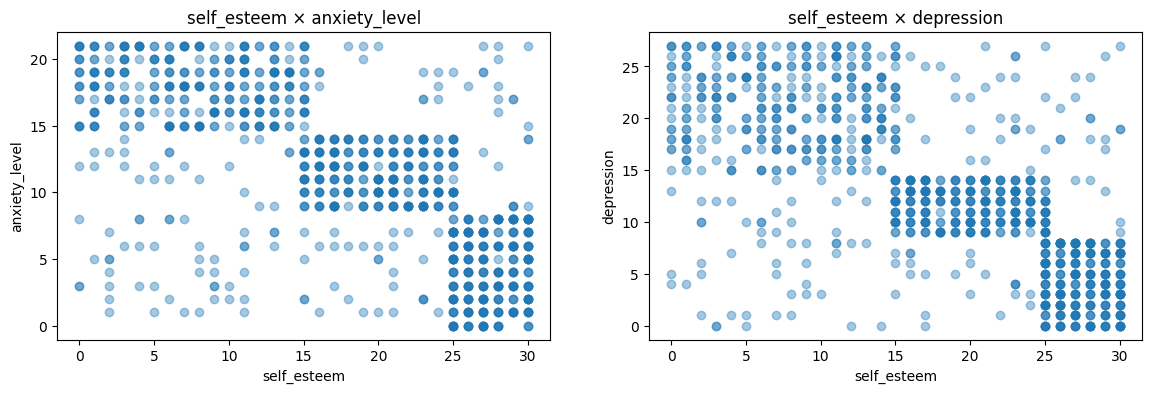

In [114]:
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# plotando o gráfico de 'self_esteem' × 'anxiety_level'
axs[0].scatter(dataset['self_esteem'], dataset['anxiety_level'], alpha=0.4)
axs[0].set_title("self_esteem × anxiety_level")
axs[0].set_xlabel('self_esteem')
axs[0].set_ylabel('anxiety_level');

# plotando o gráfico de 'self_esteem' × 'depression'
axs[1].scatter(dataset['self_esteem'], dataset['depression'], alpha=0.4)
axs[1].set_title("self_esteem × depression")
axs[1].set_xlabel('self_esteem')
axs[1].set_ylabel('depression')

Com mais pontos, a observação de tendências nos pontos é facilitada. Assim, é simples enxergar as correlações negativas entre autoestima e níveis de ansiedade e depressão.

# 5\. Pré-processamento dos dados

Na etapa de pré-processamento, vamos realizar as transformações que julgamos relevantes durante a análise exploratória e criar algumas versões diferentes do dataset para posteriormente testar o modelo de classificação.

As transformações são:
1. Remover a variável "blood_pressure", por não representar informações acuradas e, portanto, confiáveis.

2. Trocar os valores de "stress_level" para as strings Low, Medium e High. Dado que essa é a variável-alvo, queremos que ela esteja a mais explicativa possível para quem for usar o modelo/dataset.

3. Dividir os dados em conjuntos de treino e teste.

4. Transformar as variáveis "anxiety_level", "self_esteem" e "depression" para a escala 0-5 de duas formas: normalização e discretização.

## 5\.1 Drop "blood_pressure"

Para isso, usaremos a função drop() da biblioteca Pandas.

In [115]:
# Removendo a coluna "blood_pressure"

processed_dataset = dataset.drop("blood_pressure", axis='columns')
processed_dataset

,anxiety_level,self_esteem,mental_health_history,depression,headache,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,2,4,2,3,3,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,1,4,3,1,2,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,2,2,2,2,3,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,1,3,4,2,2,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,5,1,3,2,4,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,3,2,2,2,2,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,0,0,0,1,3,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,5,2,2,3,4,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,1,4,3,1,1,1,2,5,1,4,1,4,4,4,2


Temos agora um dataset com 20 colunas.


## 5\.2 Alterar values de stress_level para Low, Medium e High

Usamos aqui a função replace() para mapear e modificar os dados da coluna.

In [116]:
# Modificando labels dos valores da coluna "stress_level"

processed_dataset['stress_level'] = processed_dataset['stress_level'].replace({0: 'Low', 1: 'Medium', 2: 'High'})
processed_dataset

,anxiety_level,self_esteem,mental_health_history,depression,headache,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,2,4,2,3,3,2,3,2,3,3,2,3,3,2,Medium
1,15,8,1,15,5,1,4,3,1,2,2,1,4,1,5,1,4,5,5,High
2,12,18,1,14,2,2,2,2,2,3,2,2,3,3,2,2,3,2,2,Medium
3,16,12,1,15,4,1,3,4,2,2,2,2,4,1,4,1,4,4,5,High
4,16,28,0,7,2,5,1,3,2,4,3,4,3,1,2,1,5,0,5,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,3,2,2,2,2,3,2,2,2,3,3,2,3,3,Medium
1096,9,12,0,8,0,0,0,0,1,3,4,0,1,1,1,1,3,4,3,High
1097,4,26,0,3,1,5,2,2,3,4,4,5,1,4,1,3,1,2,1,Low
1098,21,0,1,19,5,1,4,3,1,1,1,2,5,1,4,1,4,4,4,High


## 5\.3 Dividir os dados em conjuntos de treino e teste

Vamos agora dividir os dados entre um conjunto para treinar o modelo, e outro para aplicá-lo e analisar os resultados.

Para isso usaremos a função train_test_split() da biblioteca Scikit-learn.

Vamos separar 75% dos dados para treino e 25% para teste, e printar a quantidade de instâncias em cada conjunto.

É importante realizar esse passo antes de prosseguirmos com qualquer normalização, a fim de evitar riscos de data leakage, que ocorre quando conjunto de teste revela informações sobre o conjunto de treino. Neste caso, valores mínimos e máximos.

In [117]:
# Usando a biblioteca scikit-learn para dividir o dataset

training_data, testing_data = train_test_split(processed_dataset, test_size=0.25, random_state=25)

# Removendo a vairável-alvo do conjunto de teste
testing_data = testing_data.drop("stress_level", axis='columns')

print(f"Quantidade de exemplos para treino: {training_data.shape[0]}")
print(f"Quantidade de exemplos para teste: {testing_data.shape[0]}")

Quantidade de exemplos para treino: 825
Quantidade de exemplos para teste: 275


In [118]:
# Visualizando o conjunto de treino

training_data

,anxiety_level,self_esteem,mental_health_history,depression,headache,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
538,18,11,1,26,3,1,5,3,2,1,2,2,4,2,5,1,5,4,4,High
960,21,5,1,23,5,1,4,5,1,2,1,1,3,1,5,1,4,4,4,High
398,19,8,1,21,5,1,5,5,2,1,2,2,5,2,5,1,4,5,5,High
919,7,22,0,1,5,5,3,5,5,2,2,2,5,3,4,0,1,4,4,High
409,14,18,0,14,2,3,4,2,3,2,3,2,3,2,2,3,3,2,3,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,11,20,1,10,3,2,0,3,4,2,4,1,2,3,2,0,0,2,3,Medium
886,3,30,0,8,1,4,2,1,4,4,5,4,1,5,1,3,2,1,1,Low
143,2,29,0,1,1,5,2,1,4,5,5,4,2,4,1,3,2,1,1,Low
474,6,19,0,14,2,4,4,1,2,2,2,4,3,2,5,0,1,3,5,Medium


In [119]:
# Visualizando o conjunto de teste

testing_data

,anxiety_level,self_esteem,mental_health_history,depression,headache,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying
601,20,5,1,19,4,1,3,4,1,1,2,2,4,1,4,1,5,5,5
629,10,25,1,14,3,2,2,2,3,2,3,2,3,2,3,2,2,2,3
637,6,29,0,0,0,2,5,0,3,4,0,2,5,2,0,1,4,0,2
1089,19,16,0,9,4,3,5,1,3,5,1,2,0,0,3,1,0,5,5
670,10,18,1,10,3,3,2,2,3,2,2,3,3,3,3,3,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,19,12,0,13,0,2,3,0,3,2,3,5,5,4,4,1,0,5,0
76,20,5,1,20,3,1,4,3,1,2,2,2,5,2,4,1,5,5,4
1050,7,30,0,3,1,4,2,1,3,4,4,4,2,5,1,3,2,2,1
1042,6,13,0,20,0,2,1,2,4,1,5,3,2,1,2,1,0,5,2


O conjunto está dividido corretamente, com 825 instâncias para treino e 275 para teste.

## 5\.4 Transformar as variáveis "anxiety_level", "self_esteem" e "depression" para a escala 0-5

É interessante fazer testes com nossos dados e modelos a fim de entender como obter os resultados mais precisos. Por isso, prepararemos conjuntos a partir de técnicas diferentes e observaremos os resultados quando aplicarmos no modelo.

Para transformar as variáveis em escalas de 0 a 5, vamos montar os conjuntos A, normalizados, e B, discretizados.

Como já mencionamos, é importante aplicar a técnica da normalização dentro de cada conjunto, para não influenciar o outro. Faremos o mesmo com a discretização por conveniência.

Escolhemos preservar valores zerados em todas as variáveis, por representarem informações relevantes ao estudo. Por isso, removemos a transformação dos zeros em todas as etapas.

### 5\.4\.1 Teste A: Normalização

#### Conjunto de Treino

Utilizaremos funções da biblioteca Pandas para aplicar a normalização.

In [120]:
# Criando uma cópia do dataset original

training_data_A = training_data.copy()
training_data_A

,anxiety_level,self_esteem,mental_health_history,depression,headache,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
538,18,11,1,26,3,1,5,3,2,1,2,2,4,2,5,1,5,4,4,High
960,21,5,1,23,5,1,4,5,1,2,1,1,3,1,5,1,4,4,4,High
398,19,8,1,21,5,1,5,5,2,1,2,2,5,2,5,1,4,5,5,High
919,7,22,0,1,5,5,3,5,5,2,2,2,5,3,4,0,1,4,4,High
409,14,18,0,14,2,3,4,2,3,2,3,2,3,2,2,3,3,2,3,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,11,20,1,10,3,2,0,3,4,2,4,1,2,3,2,0,0,2,3,Medium
886,3,30,0,8,1,4,2,1,4,4,5,4,1,5,1,3,2,1,1,Low
143,2,29,0,1,1,5,2,1,4,5,5,4,2,4,1,3,2,1,1,Low
474,6,19,0,14,2,4,4,1,2,2,2,4,3,2,5,0,1,3,5,Medium


In [121]:
# Selecionando os nomes das variáveis que vamos transformar
variables = ["anxiety_level", "self_esteem", "depression"]

# Normalizando apenas os valores diferentes de 0
for variable_name in variables:
      non_zero_min = training_data_A.loc[training_data_A[variable_name] != 0, variable_name].min()
      max_value = training_data_A[variable_name].max()

      training_data_A.loc[training_data_A[variable_name] != 0, variable_name] = (
          5 * (training_data_A.loc[training_data_A[variable_name] != 0, variable_name] - non_zero_min)
          / (max_value - non_zero_min)
      ). round(2) # Arredondando para 2 casas decimais

# Exibindo o resultado
training_data_A

,anxiety_level,self_esteem,mental_health_history,depression,headache,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
538,4.25,1.72,1,4.81,3,1,5,3,2,1,2,2,4,2,5,1,5,4,4,High
960,5.00,0.69,1,4.23,5,1,4,5,1,2,1,1,3,1,5,1,4,4,4,High
398,4.50,1.21,1,3.85,5,1,5,5,2,1,2,2,5,2,5,1,4,5,5,High
919,1.50,3.62,0,0.00,5,5,3,5,5,2,2,2,5,3,4,0,1,4,4,High
409,3.25,2.93,0,2.50,2,3,4,2,3,2,3,2,3,2,2,3,3,2,3,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,2.50,3.28,1,1.73,3,2,0,3,4,2,4,1,2,3,2,0,0,2,3,Medium
886,0.50,5.00,0,1.35,1,4,2,1,4,4,5,4,1,5,1,3,2,1,1,Low
143,0.25,4.83,0,0.00,1,5,2,1,4,5,5,4,2,4,1,3,2,1,1,Low
474,1.25,3.10,0,2.50,2,4,4,1,2,2,2,4,3,2,5,0,1,3,5,Medium


Vamos criar histogramas para os novos valores e compará-los com os originais, para entender se as distribuições se mantém.

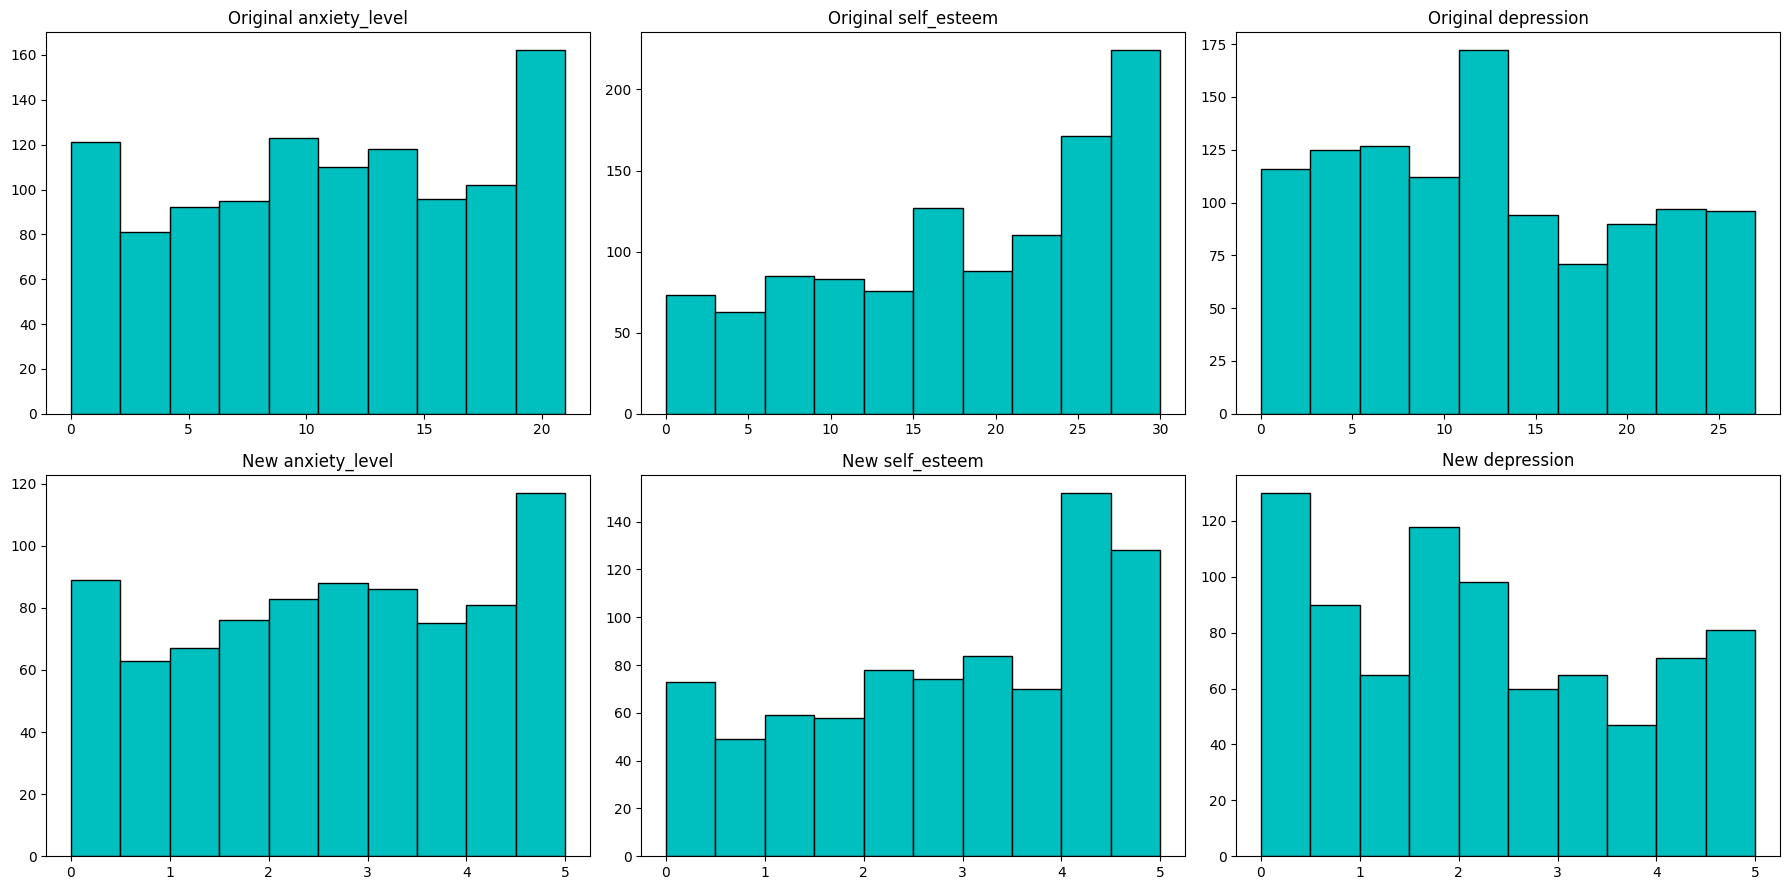

In [122]:
# Organizando os atributos em num dicionário, com label
variables = {
    'Original anxiety_level': dataset["anxiety_level"],
    'Original self_esteem': dataset["self_esteem"],
    'Original depression': dataset["depression"],
    'New anxiety_level': training_data_A["anxiety_level"],
    'New self_esteem': training_data_A["self_esteem"],
    'New depression': training_data_A["depression"]
}

# Plotando histogramas para cada atributo
fig, axs = plt.subplots(2, 3, figsize=(18, 9))

for i, (name, variable) in enumerate(variables.items()):
    row = i // 3
    col = i % 3
    axs[row, col].hist(variable, bins=10, color='c', edgecolor='black')
    axs[row, col].set_title(name)

plt.tight_layout()
plt.show()

Vemos que em 'anxiety_level' e 'self_esteem', as distribuições se mantém muito semelhantes.

No atributo 'depression', no entanto, a distribuição torna-se mais assimétrica para a esquerda, com um novo pico no intervalo entre 0 e 0.5. Vamos observar o boxplot para entender mais afundo essa alteração.

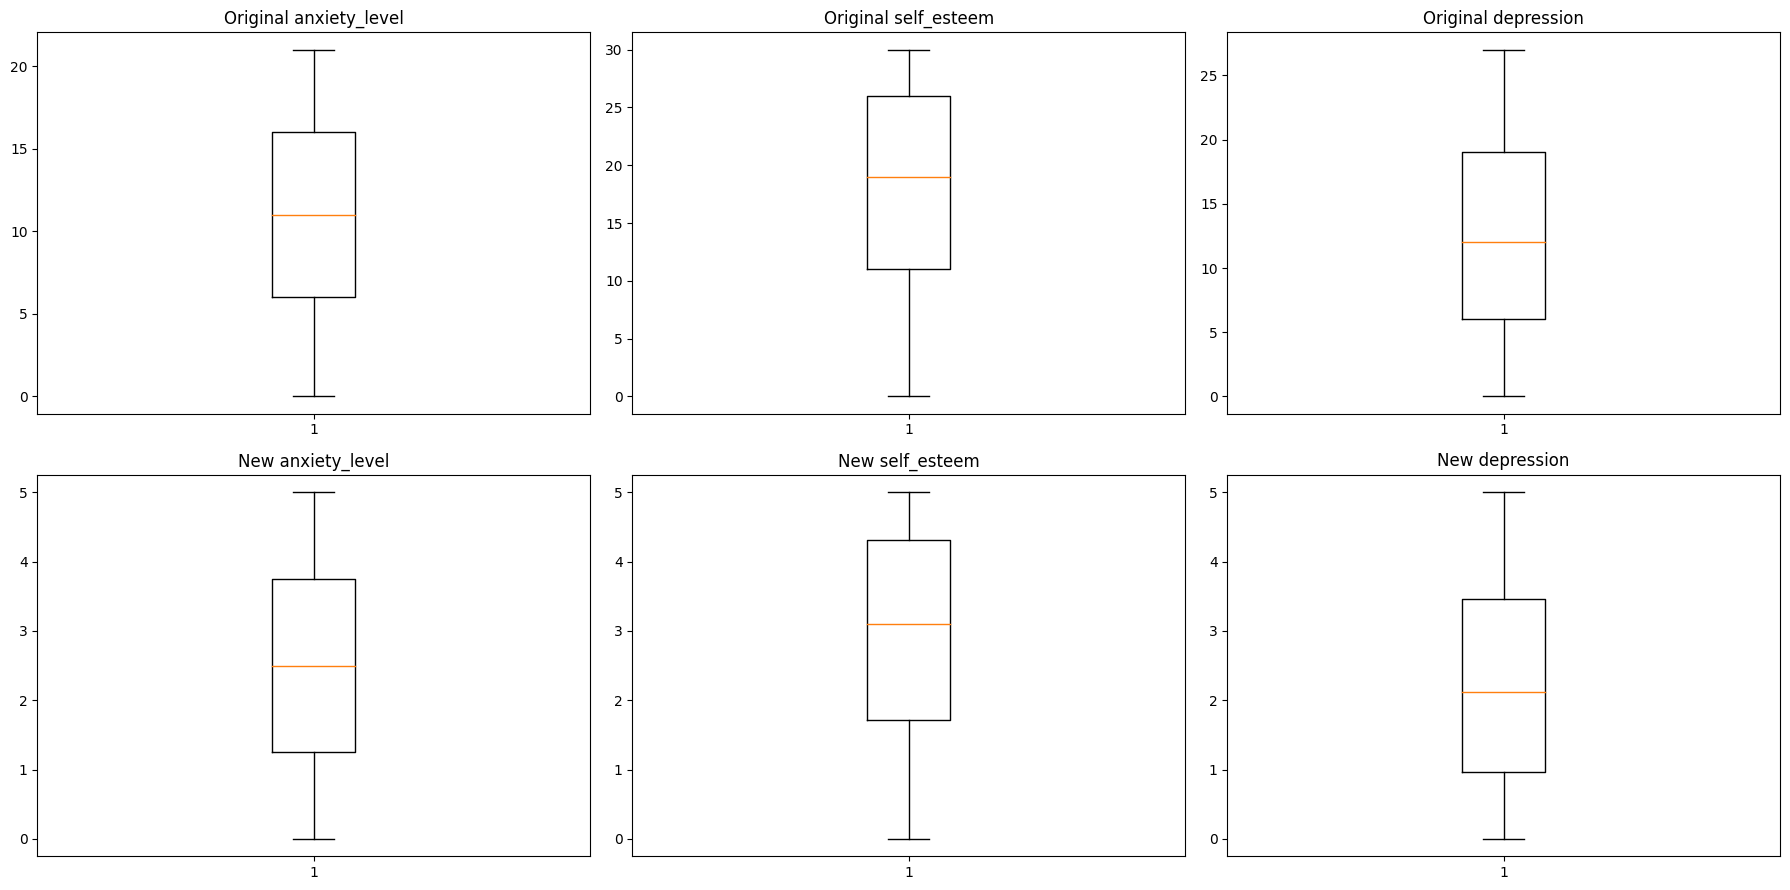

In [123]:
# Plotando boxplots para cada atributo
fig, axs = plt.subplots(2, 3, figsize=(18, 9))

for i, (name, variable) in enumerate(variables.items()):
    row = i // 3
    col = i % 3
    axs[row, col].boxplot(variable)
    axs[row, col].set_title(name)

plt.tight_layout()
plt.show()

O boxplot revela que, com a transformação, a distribuição de todas as variáveis manteve-se semelhante.

Cabe observar, na hora de aplicar no modelo, se existem impactos negativos dessa transformação.

#### Conjunto de teste

Com as verificações feitas, vamos aplicar a mesma transformação para o conjunto de teste.

In [124]:
# Normalizando no conjunto de teste

# Criando uma cópia do dataset original
testing_data_A = testing_data.copy()
testing_data_A

,anxiety_level,self_esteem,mental_health_history,depression,headache,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying
601,20,5,1,19,4,1,3,4,1,1,2,2,4,1,4,1,5,5,5
629,10,25,1,14,3,2,2,2,3,2,3,2,3,2,3,2,2,2,3
637,6,29,0,0,0,2,5,0,3,4,0,2,5,2,0,1,4,0,2
1089,19,16,0,9,4,3,5,1,3,5,1,2,0,0,3,1,0,5,5
670,10,18,1,10,3,3,2,2,3,2,2,3,3,3,3,3,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,19,12,0,13,0,2,3,0,3,2,3,5,5,4,4,1,0,5,0
76,20,5,1,20,3,1,4,3,1,2,2,2,5,2,4,1,5,5,4
1050,7,30,0,3,1,4,2,1,3,4,4,4,2,5,1,3,2,2,1
1042,6,13,0,20,0,2,1,2,4,1,5,3,2,1,2,1,0,5,2


In [125]:
# Selecionando os nomes das variáveis que vamos transformar
variables = ["anxiety_level", "self_esteem", "depression"]

# Normalizando apenas os valores diferentes de 0
for variable_name in variables:

      non_zero_min = testing_data_A.loc[testing_data_A[variable_name] != 0, variable_name].min()
      max_value = testing_data_A[variable_name].max()

      testing_data_A.loc[testing_data_A[variable_name] != 0, variable_name] = (
          5 * (testing_data_A.loc[testing_data_A[variable_name] != 0, variable_name] - non_zero_min)
          / (max_value - non_zero_min)
      ). round(2) # Arredondando para 2 casas decimais

# Exibindo o resultado
testing_data_A

,anxiety_level,self_esteem,mental_health_history,depression,headache,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying
601,4.75,0.69,1,3.46,4,1,3,4,1,1,2,2,4,1,4,1,5,5,5
629,2.25,4.14,1,2.50,3,2,2,2,3,2,3,2,3,2,3,2,2,2,3
637,1.25,4.83,0,0.00,0,2,5,0,3,4,0,2,5,2,0,1,4,0,2
1089,4.50,2.59,0,1.54,4,3,5,1,3,5,1,2,0,0,3,1,0,5,5
670,2.25,2.93,1,1.73,3,3,2,2,3,2,2,3,3,3,3,3,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,4.50,1.90,0,2.31,0,2,3,0,3,2,3,5,5,4,4,1,0,5,0
76,4.75,0.69,1,3.65,3,1,4,3,1,2,2,2,5,2,4,1,5,5,4
1050,1.50,5.00,0,0.38,1,4,2,1,3,4,4,4,2,5,1,3,2,2,1
1042,1.25,2.07,0,3.65,0,2,1,2,4,1,5,3,2,1,2,1,0,5,2


Temos, portanto, os conjuntos 'training_data_A' e 'testing_data_A', com a normalização aplicada.

### 5\.4\.1 Teste B: Discretização

Na discretização, organizaremos as variáveis selecionadas em novas escalas pela segmentação em bins.

Vamos organizar os bins manualmente, como as escalas são diversas, lembrando de manter os valores 0 na escala originais como 0 na nova escala.


- anxiety_level
  - Escala atual: 0-21
  - Escala nova:
    - 0: 0
    - 1: 1-4
    - 2: 5-8
    - 3: 9-12
    - 4: 13-16
    - 5: 17-21

- self_esteem
  - Escala atual: 0-30
  - Escala nova:
    - 0: 0
    - 1: 1-6
    - 2: 7-12
    - 3: 13-18
    - 4: 19-24
    - 5: 25-30

- depression
  - Escala atual: 0-27
  - Escala nova:
    - 0: 0
    - 1: 1-5
    - 2: 6-10
    - 3: 11-15
    - 4: 16-21
    - 5: 22-27

A proposta é que os valores novos também possam ser referidos de forma simplificada como: muito baixo, baixo, médio, alto e muito alto.

Para fazer a segmentação, usaremos a função cut() da biblioteca Pandas.

#### Conjunto de treino

In [126]:
# Criando uma cópia do dataset
training_data_B = training_data.copy()

# Usando pd.cut() para transformar os valores
training_data_B['anxiety_level'] = pd.cut(x=training_data_B['anxiety_level'], bins=[ -0.001, 0.99, 4, 8, 12, 16, 21],
					labels=[0, 1, 2, 3, 4, 5])

training_data_B['self_esteem'] = pd.cut(x=training_data_B['self_esteem'], bins=[ -0.001, 0.99, 6, 12, 18, 24, 30],
					labels=[0, 1, 2, 3, 4, 5])

training_data_B['depression'] = pd.cut(x=training_data_B['depression'], bins=[ -0.001, 0.99, 5, 10, 15, 21, 27],
					labels=[0, 1, 2, 3, 4, 5])

# Exibindo o novo conjunto
training_data_B

,anxiety_level,self_esteem,mental_health_history,depression,headache,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
538,5,2,1,5,3,1,5,3,2,1,2,2,4,2,5,1,5,4,4,High
960,5,1,1,5,5,1,4,5,1,2,1,1,3,1,5,1,4,4,4,High
398,5,2,1,4,5,1,5,5,2,1,2,2,5,2,5,1,4,5,5,High
919,2,4,0,1,5,5,3,5,5,2,2,2,5,3,4,0,1,4,4,High
409,4,3,0,3,2,3,4,2,3,2,3,2,3,2,2,3,3,2,3,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,3,4,1,2,3,2,0,3,4,2,4,1,2,3,2,0,0,2,3,Medium
886,1,5,0,2,1,4,2,1,4,4,5,4,1,5,1,3,2,1,1,Low
143,1,5,0,1,1,5,2,1,4,5,5,4,2,4,1,3,2,1,1,Low
474,2,4,0,3,2,4,4,1,2,2,2,4,3,2,5,0,1,3,5,Medium


#### Conjunto de teste

In [127]:
# Criando uma cópia do dataset
testing_data_B = testing_data.copy()

# Usando pd.cut() para transformar os valores
testing_data_B['anxiety_level'] = pd.cut(x=testing_data_B['anxiety_level'], bins=[ -0.001, 0.99, 4, 8, 12, 16, 21],
					labels=[0, 1, 2, 3, 4, 5])

testing_data_B['self_esteem'] = pd.cut(x=testing_data_B['self_esteem'], bins=[ -0.001, 0.99, 6, 12, 18, 24, 30],
					labels=[0, 1, 2, 3, 4, 5])

testing_data_B['depression'] = pd.cut(x=testing_data_B['depression'], bins=[ -0.001, 0.99, 5, 10, 15, 21, 27],
					labels=[0, 1, 2, 3, 4, 5])

# Exibindo o novo conjunto
testing_data_B

,anxiety_level,self_esteem,mental_health_history,depression,headache,sleep_quality,breathing_problem,noise_level,living_conditions,safety,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying
601,5,1,1,4,4,1,3,4,1,1,2,2,4,1,4,1,5,5,5
629,3,5,1,3,3,2,2,2,3,2,3,2,3,2,3,2,2,2,3
637,2,5,0,0,0,2,5,0,3,4,0,2,5,2,0,1,4,0,2
1089,5,3,0,2,4,3,5,1,3,5,1,2,0,0,3,1,0,5,5
670,3,3,1,2,3,3,2,2,3,2,2,3,3,3,3,3,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800,5,2,0,3,0,2,3,0,3,2,3,5,5,4,4,1,0,5,0
76,5,1,1,4,3,1,4,3,1,2,2,2,5,2,4,1,5,5,4
1050,2,5,0,1,1,4,2,1,3,4,4,4,2,5,1,3,2,2,1
1042,2,3,0,4,0,2,1,2,4,1,5,3,2,1,2,1,0,5,2


In [128]:
print(training_data_B['anxiety_level'].value_counts())
print(training_data_B['self_esteem'].value_counts())
print(training_data_B['depression'].value_counts())

print(testing_data_B['anxiety_level'].value_counts())
print(testing_data_B['self_esteem'].value_counts())
print(testing_data_B['depression'].value_counts())

5    198
3    171
4    161
2    143
1    128
0     24
Name: anxiety_level, dtype: int64
5    280
4    154
3    152
2    117
1    104
0     18
Name: self_esteem, dtype: int64
2    183
3    176
1    158
5    152
4    123
0     33
Name: depression, dtype: int64
5    66
3    62
4    53
1    45
2    44
0     5
Name: anxiety_level, dtype: int64
5    85
3    52
4    50
2    43
1    39
0     6
Name: self_esteem, dtype: int64
3    74
2    56
4    54
5    41
1    39
0    11
Name: depression, dtype: int64


Observando rapidamente a contagem de valores de cada uma das variáveis transformada, notamos que a distribuição dos valores se mantém em ambos os novos conjuntos.

## 5.5 Separar conjunto mais enxuto

Por fim, a partir dos conjuntos de dados já gerados, vamos criar réplicas que incluem apenas os 10 atributos que mais impactam o nível de estresse de um aluno. Incluiremos "_reduced" no nomes das variáveis desses conjuntos.

O objetivo aqui é também aplicá-los no modelo, e entender se um questionário mais enxuto seria suficiente para prever nossa variável-alvo.

Para separar os conjuntos, vamos usar novamente a biblioteca Pandas.

Iniciaremos listando as variáveis a serem separadas.



## 5\.5\.1 Conjunto de treino normalizado reduzido

In [129]:
variables_training = ["self_esteem", "bullying", "sleep_quality", "future_career_concerns", "anxiety_level",
                 "depression", "academic_performance", "headache", "safety", "basic_needs", "stress_level"]

In [130]:
# Criando uma cópia do dataset
training_data_A_reduced = training_data_A.copy()

# selecionando um subconjunto de colunas para todas as linhas
training_data_A_reduced = training_data_A_reduced.loc[:, variables_training]
training_data_A_reduced

,self_esteem,bullying,sleep_quality,future_career_concerns,anxiety_level,depression,academic_performance,headache,safety,basic_needs,stress_level
538,1.72,4,1,5,4.25,4.81,2,3,1,2,High
960,0.69,4,1,5,5.00,4.23,1,5,2,1,High
398,1.21,5,1,5,4.50,3.85,2,5,1,2,High
919,3.62,4,5,4,1.50,0.00,2,5,2,2,High
409,2.93,3,3,2,3.25,2.50,2,2,2,3,Medium
...,...,...,...,...,...,...,...,...,...,...,...
255,3.28,3,2,2,2.50,1.73,1,3,2,4,Medium
886,5.00,1,4,1,0.50,1.35,4,1,4,5,Low
143,4.83,1,5,1,0.25,0.00,4,1,5,5,Low
474,3.10,5,4,5,1.25,2.50,4,2,2,2,Medium


## 5\.5\.2 Conjunto de teste normalizado reduzido

In [131]:
variables_testing = ["self_esteem", "bullying", "sleep_quality", "future_career_concerns", "anxiety_level",
                 "depression", "academic_performance", "headache", "safety", "basic_needs"]

In [132]:
# Criando uma cópia do dataset
testing_data_A_reduced = testing_data_A.copy()

# selecionando um subconjunto de colunas para todas as linhas
testing_data_A_reduced = testing_data_A_reduced.loc[:, variables_testing]
testing_data_A_reduced

,self_esteem,bullying,sleep_quality,future_career_concerns,anxiety_level,depression,academic_performance,headache,safety,basic_needs
601,0.69,5,1,4,4.75,3.46,2,4,1,2
629,4.14,3,2,3,2.25,2.50,2,3,2,3
637,4.83,2,2,0,1.25,0.00,2,0,4,0
1089,2.59,5,3,3,4.50,1.54,2,4,5,1
670,2.93,3,3,3,2.25,1.73,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...
800,1.90,0,2,4,4.50,2.31,5,0,2,3
76,0.69,4,1,4,4.75,3.65,2,3,2,2
1050,5.00,1,4,1,1.50,0.38,4,1,4,4
1042,2.07,2,2,2,1.25,3.65,3,0,1,5


## 5\.5\.3 Conjunto de treino discretizado reduzido

In [133]:
# Criando uma cópia do dataset
training_data_B_reduced = training_data_B.copy()

# selecionando um subconjunto de colunas para todas as linhas
training_data_B_reduced = training_data_B_reduced.loc[:, variables_training]
training_data_B_reduced

,self_esteem,bullying,sleep_quality,future_career_concerns,anxiety_level,depression,academic_performance,headache,safety,basic_needs,stress_level
538,2,4,1,5,5,5,2,3,1,2,High
960,1,4,1,5,5,5,1,5,2,1,High
398,2,5,1,5,5,4,2,5,1,2,High
919,4,4,5,4,2,1,2,5,2,2,High
409,3,3,3,2,4,3,2,2,2,3,Medium
...,...,...,...,...,...,...,...,...,...,...,...
255,4,3,2,2,3,2,1,3,2,4,Medium
886,5,1,4,1,1,2,4,1,4,5,Low
143,5,1,5,1,1,1,4,1,5,5,Low
474,4,5,4,5,2,3,4,2,2,2,Medium


## 5\.5\.4 Conjunto de teste discretizado reduzido

In [134]:
# Criando uma cópia do dataset
testing_data_B_reduced = testing_data_B.copy()

# selecionando um subconjunto de colunas para todas as linhas
testing_data_B_reduced = testing_data_B_reduced.loc[:, variables_testing]
testing_data_B_reduced

,self_esteem,bullying,sleep_quality,future_career_concerns,anxiety_level,depression,academic_performance,headache,safety,basic_needs
601,1,5,1,4,5,4,2,4,1,2
629,5,3,2,3,3,3,2,3,2,3
637,5,2,2,0,2,0,2,0,4,0
1089,3,5,3,3,5,2,2,4,5,1
670,3,3,3,3,3,2,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...
800,2,0,2,4,5,3,5,0,2,3
76,1,4,1,4,5,4,2,3,2,2
1050,5,1,4,1,2,1,4,1,4,4
1042,3,2,2,2,2,4,3,0,1,5


# 6\. Conclusão

A partir da análise do dataset, foi possível observar as distribuições das variáveis e trabalhar as escalas de seus valores com técnicas distintas, a fim de auxiliar análises.

Também pudemos entender quais atributos mais impactam o nível de estresse dos alunos – tanto separados por fator, quanto em comparação ao todo – e criar um novo dataset reduzido, com o objetivo de comparar resultados no modelo.

Ao todo, geramos 5 datasets utilizando técnicas de pré-processamento distintas, cada um já separado em conjuntos de treino e teste. Eles estão listados abaixo:


In [136]:
# Datasets para testar modelo de classificação

training_data
testing_data

training_data_A
testing_data_A

training_data_B
testing_data_B

training_data_A_reduced
testing_data_A_reduced

training_data_B_reduced
testing_data_B_reduced

,self_esteem,bullying,sleep_quality,future_career_concerns,anxiety_level,depression,academic_performance,headache,safety,basic_needs
601,1,5,1,4,5,4,2,4,1,2
629,5,3,2,3,3,3,2,3,2,3
637,5,2,2,0,2,0,2,0,4,0
1089,3,5,3,3,5,2,2,4,5,1
670,3,3,3,3,3,2,3,3,2,2
...,...,...,...,...,...,...,...,...,...,...
800,2,0,2,4,5,3,5,0,2,3
76,1,4,1,4,5,4,2,3,2,2
1050,5,1,4,1,2,1,4,1,4,4
1042,3,2,2,2,2,4,3,0,1,5


O dataset se mostrou interessante e simples de trabalhar, sem grandes necessidades de limpeza de dados.

Ao longo do trabalho, teria sido interessante ter à disposição dados pessoais dos respondentes, como idade e gênero, para poder construir mais tipos de análises, aprofundando em características do indivíduo.

Seria, portanto, interessante incluir estes campos em pesquisas futuras.